In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.animation as animation
from IPython.display import display, Markdown

import numpy as np
from skimage.graph import route_through_array
import rasterio
import geopandas as gpd

from gridfinder._util import save_raster, clip_line_poly
from gridfinder.prepare import create_filter, prepare_ntl, prepare_roads
from gridfinder import gridfinder as gf
from gridfinder.post import threshold, accuracy, guess2geom

# Get inputs

In [4]:
targets_in = Path('uganda/ntl.tif')
costs_in = Path('uganda/roads.tif')

In [5]:
targets, transform, start = gf.get_targets(targets_in)
costs = gf.get_costs(costs_in)

In [6]:
costs.shape

(2746, 2608)

In [ ]:
import geopandas as gpd
grid = gpd.read_file('tanzania/grid_created.gpkg')
grid.plot()

# Create generator

In [7]:
iter_dist = list(gf.optimise(targets, costs, start))

1.0000044682952114
2.000008936590423
3.000013404885634
4.00000390975831
5.000008378053521
6.000012846348732
7.000003351221409
8.00000781951662
9.000012287811831
10.000002792684507
11.000007260979718
12.000011729274929
13.000002234147606
14.000006702442818
15.000011170738029
16.000001675610704
17.000006143905914
18.000010612201127
19.000001117073804
20.000005585369014
21.000010053664226
22.0000005585369
23.000005026832113
24.000009495127323
25.0
26.000004468295213
27.000008936590422
28.000013404885635
29.00000390975831
30.000008378053522
31.00001284634873
32.00000335122141
33.00000781951662
34.00001228781183
35.000002792684505
36.00000726097972
37.00001172927493
38.00000223414761
39.00000670244282
40.00001117073803
41.000001675610704
42.000006143905914
43.00001061220113
44.0000011170738
45.00000558536902
46.00001005366423
47.000000558536904
48.00000502683211
49.00000949512732
50.0
51.00000446829521
52.000008936590426
53.000013404885635
54.00000390975831
55.00000837805352
56.000012846348

In [ ]:
import pickle
pickle.dump(iter_dist, open( "dists.p", "wb" ))

# Animate
Currently generating on the fly, could also copy all into a list of arrays and then animate after

<IPython.core.display.Javascript object>


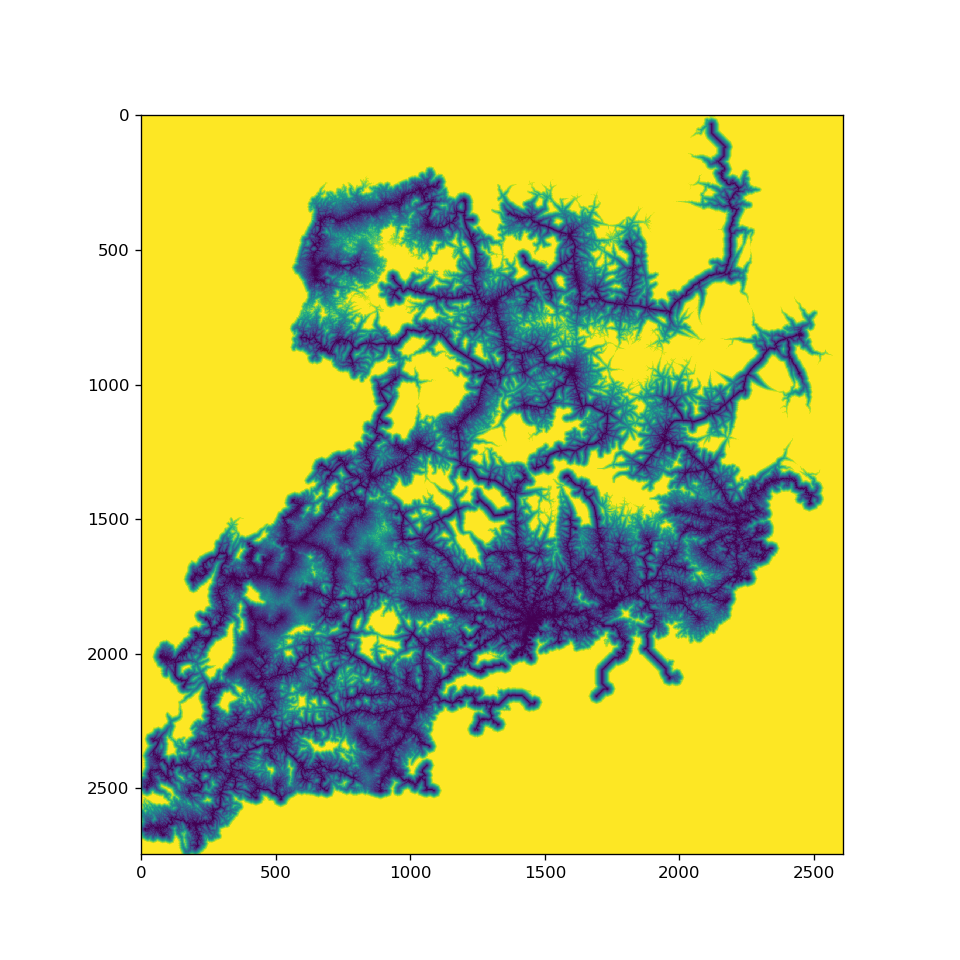

In [12]:
fig = plt.figure(figsize=(8, 8))
#ax = fig.gca()

im = plt.imshow(iter_dist[10], animated=True, vmin=0, vmax=30, cmap='viridis')
#grid.plot(ax=ax)
#im = plt.imshow(next(iter_dist), animated=True, vmin=0, vmax=10, cmap='viridis')

count = 0
def updatefig(i):
    global count
    count += 1
    im.set_data(iter_dist[count])
    #im.set_data(next(iter_dist))
    return im
    
ani = animation.FuncAnimation(fig, updatefig, interval=50)
plt.show()

In [9]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
#ax.imshow(iter_dist[0])
grid.plot(ax=ax)
plt.show()

<IPython.core.display.Javascript object>

NameError: name 'grid' is not defined